In [8]:
#imports 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle5

# ROC curve

In [94]:
categories = pickle5.load(open('../../../phynteny_utils/phrog_annotation_info/integer_category.pkl', 'rb'))
categories = dict(zip([str(i) for i in list(categories.keys())],list(categories.values())))

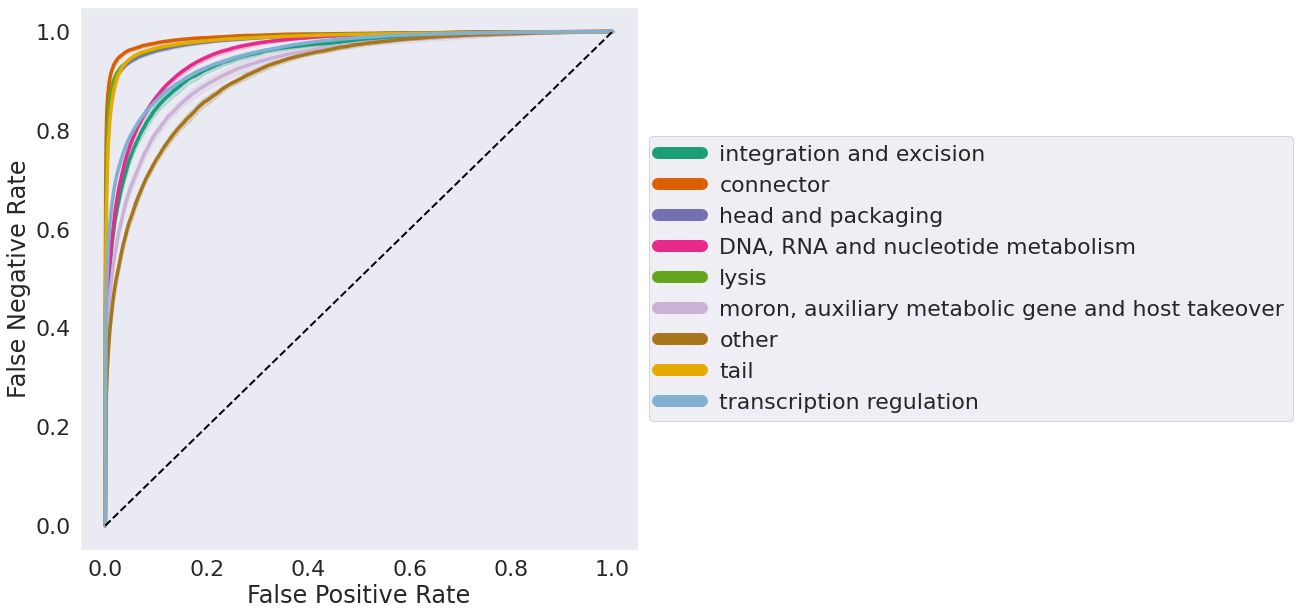

In [5]:
base = 'per_fold_test_'
ROC_mat = [[] for i in range(10)]
#colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"] 
colors = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e","#cab2d6",  "#a6761d", "#e6ab02", "#80b1d3"]
for i in range(10): 
    
    file_name = base + str(i) + '_ROC.tsv'
    df = pd.read_csv(file_name, sep = '\t', index_col = 'Unnamed: 0')
    
    categories = [i for i in df.columns.to_list() if i != 'FPR']
    
    for j in range(len(categories)): 
        
        ROC_mat[j].append(df[categories[j]].to_list())  
    
FPR = df['FPR']
sns.set(font_scale=2)

sns.set_style("dark")
plt.rcParams["figure.figsize"] = (10,10)

for k in range(len(categories)): 
    
    this_df = pd.DataFrame(np.array(ROC_mat[k]).T)
    mean = this_df.mean(axis = 1)
    #std = 1.96 * this_df.std(axis = 1)/np.sqrt(4)
    std =  this_df.std(axis = 1)
    upper = mean + std
    lower = mean - std
    
    ax = plt.plot(FPR, mean,  color = colors[k], label = categories[k], lw = 3.5)
    plt.fill_between(FPR,lower, upper, color = colors[k], alpha = 0.2) 
    
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")

    
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.savefig('/home/grig0076/GitHubs/Phynteny/all_features_ROC.png')    

leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(12.0)
    
plt.show() 

In [95]:
categoriesrt_df = pd.DataFrame(columns = {'precision', 'recall', 'f1-score', 'support', 'class'} )

for i in range(0,10): 
    report = pickle5.load(open('per_fold_test_' + str(i) + '_report.tsv', 'rb'))
    report = pd.DataFrame(report).T
    report['class'] = report.index
    
    report_df = pd.concat([report_df, report])
    
report_df =pd.melt(report_df, id_vars = ['class', 'support'], value_vars = ['precision', 'recall', 'f1-score'], var_name = 'metric', value_name='score')
report_df['category'] = [categories.get(c) for c in report_df['class']]
report_df = report_df[~report_df['class'].isin(['accuracy', 'macro avg'])]

/home/grig0076/miniconda3/envs/notebook_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3460: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


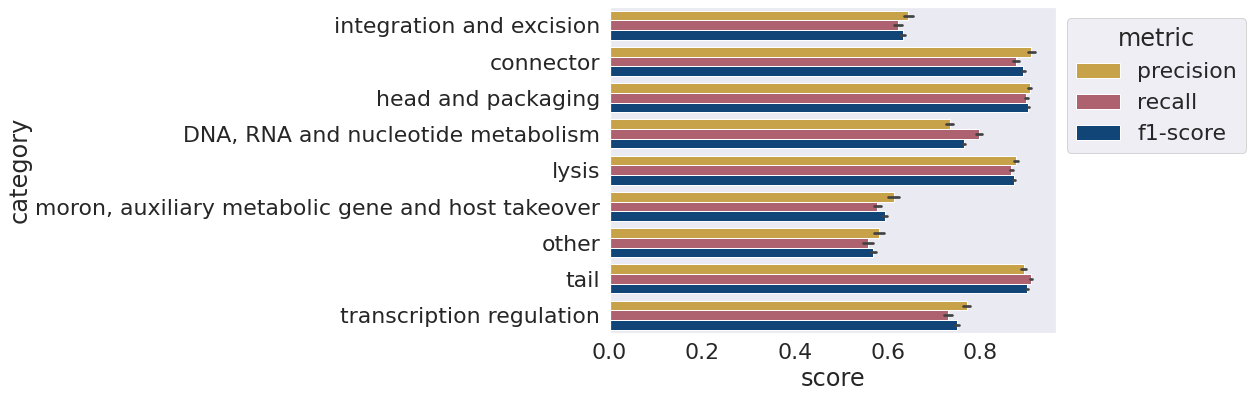

In [108]:
fig = plt.figure(figsize=(8, 6))
ax = sns.barplot(data = report_df, x = 'score', y = 'category', hue = 'metric', palette = ('#DDAA33', '#BB5566' , '#004488'), ci = 90)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

In [28]:
#then in the paper will move on to implement the phynteny score and use pareto opimization 

In [ ]:
# plot the model validation loss etc. 

In [ ]:
# after this then predict the function of unknown genes. Report the increase and then save model as a file 